In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
df = pd.read_csv('../Datasets/2022_Forbes_billionaires.csv')
df

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...,...
2595,2595,2578,Jorge Gallardo Ballart,$1 B,80,Spain,pharmaceuticals,Healthcare
2596,2596,2578,Nari Genomal,$1 B,82,Philippines,apparel,Fashion & Retail
2597,2597,2578,Ramesh Genomal,$1 B,71,Philippines,apparel,Fashion & Retail
2598,2598,2578,Sunder Genomal,$1 B,68,Philippines,garments,Fashion & Retail


In [7]:
df.isnull().sum()

Unnamed: 0    0
rank          0
name          0
networth      0
age           0
country       0
source        0
industry      0
dtype: int64

In [9]:
df.networth = df.networth.replace('[$B]','',regex=True).astype('float64')
df

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...,...
2595,2595,2578,Jorge Gallardo Ballart,1.0,80,Spain,pharmaceuticals,Healthcare
2596,2596,2578,Nari Genomal,1.0,82,Philippines,apparel,Fashion & Retail
2597,2597,2578,Ramesh Genomal,1.0,71,Philippines,apparel,Fashion & Retail
2598,2598,2578,Sunder Genomal,1.0,68,Philippines,garments,Fashion & Retail


In [11]:
df.networth.mean()

4.8607499999999995

In [13]:
df.networth.median()

2.4

In [15]:
df.networth.min()

1.0

In [17]:
df.networth.max()

219.0

In [19]:
df.networth.describe()

count    2600.000000
mean        4.860750
std        10.659671
min         1.000000
25%         1.500000
50%         2.400000
75%         4.500000
max       219.000000
Name: networth, dtype: float64

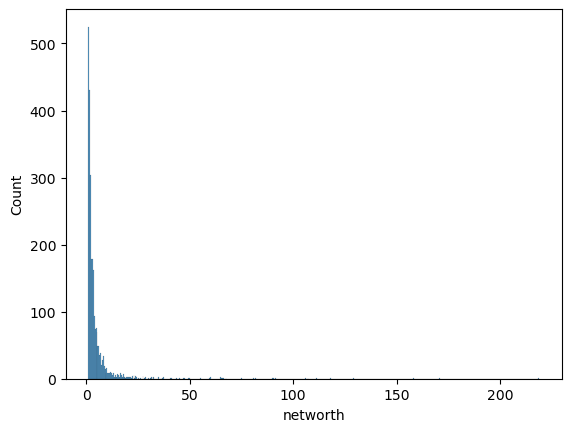

In [21]:
sb.histplot(df.networth)
plt.show()

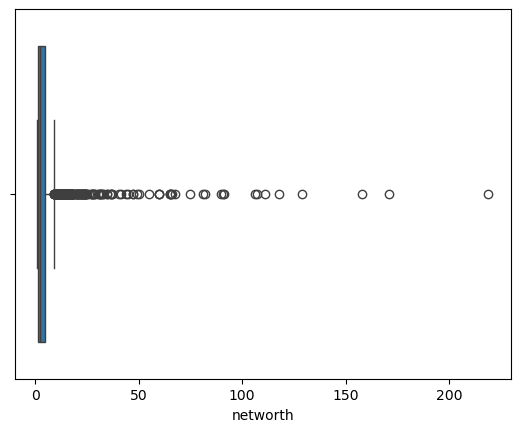

In [22]:
sb.boxplot(x=df.networth)
plt.show()

In [23]:
df.groupby('name')['networth'].sum().nlargest(10)

name
Elon Musk                    219.0
Jeff Bezos                   171.0
Bernard Arnault & family     158.0
Bill Gates                   129.0
Warren Buffett               118.0
Larry Page                   111.0
Sergey Brin                  107.0
Larry Ellison                106.0
Steve Ballmer                 91.4
Mukesh Ambani                 90.7
Name: networth, dtype: float64

In [24]:
df.country.value_counts()

country
United States           719
China                   515
India                   161
Germany                 130
Russia                   81
                       ... 
Venezuela                 1
Portugal                  1
Algeria                   1
Eswatini (Swaziland)      1
Estonia                   1
Name: count, Length: 75, dtype: int64

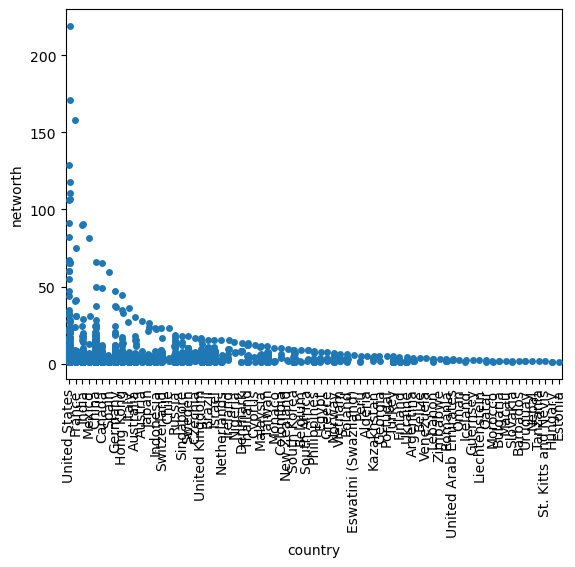

In [25]:
sb.stripplot(x=df.country, y=df.networth)
plt.xticks(rotation=90)
plt.show()

In [27]:
df.industry.value_counts()

industry
Finance & Investments          386
Technology                     329
Manufacturing                  322
Fashion & Retail               246
Healthcare                     212
Food & Beverage                201
Real Estate                    189
Diversified                    178
Media & Entertainment           95
Energy                          93
Automotive                      69
Metals & Mining                 67
Service                         51
Construction & Engineering      43
Logistics                       35
Telecom                         35
Sports                          26
Gambling & Casinos              23
Name: count, dtype: int64

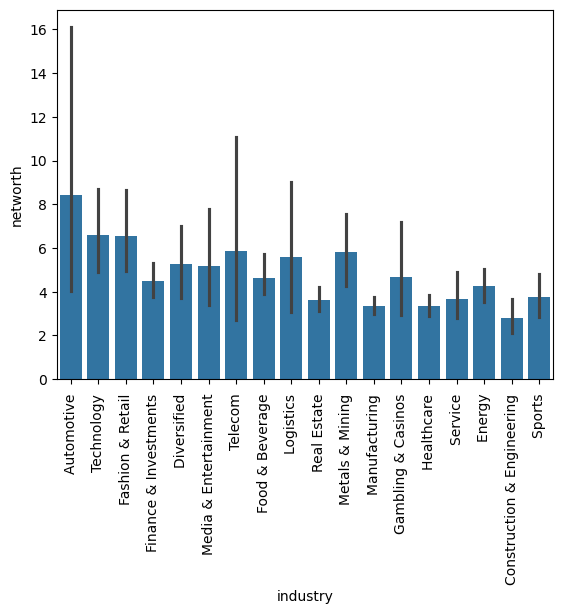

In [31]:
df.groupby('industry')['networth'].mean().nlargest()
sb.barplot(x=df.industry,y=df.networth)
plt.xticks(rotation=90)
plt.show()


In [32]:
df.age.mean()

64.27192307692307

In [33]:
df.age.median()

64.0

In [53]:
a=df.groupby('name')[['age','networth']].mean().nlargest(1,'age')
a

,age,networth
name,,
George Joseph,100.0,1.8


In [57]:
b=df.groupby('name')[['age','networth']].mean().nsmallest(1,'age')
b

,age,networth
name,,
Kevin David Lehmann,19.0,2.4
